# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Funções

## Plot de 2 x 2

In [2]:
def plot_2x2(titulo, dados1, dados2, dados3, dados4,
                x1, y1 = "CountTotal", t1 ='Todas as Fases',
                x2 = '', y2 = "CountPre", t2 ='Fase pré',
                x3 = '', y3 = "CountDurante", t3 ='Fase Durante',
                x4 = '', y4 = "CountPos", t4 ='Fase Pós',
                rx = 0, tam_fig = (18,12), tipo = 'box', share = False):

    if x2 == '':
        x2 = x1
    if x3 == '':
        x3 = x1
    if x4 == '':
        x4 = x1

    fig, axes = plt.subplots(2, 2, figsize=tam_fig, sharey=share)
    fig.suptitle(titulo, fontsize = 20)
    plt.subplots_adjust(hspace = .3, wspace = 0.1)
    
    if tipo == 'box':
        sns.boxplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.boxplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'count':
        sns.countplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.countplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'bar':
        sns.barplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.barplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")
    elif tipo == 'hist':
        sns.histplot(ax=axes[0,0], data=dados1, x=x1)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[0,1], data=dados2, x=x2)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[1,0], data=dados3, x=x3)
        sns.set_palette("Set2")
        sns.histplot(ax=axes[1,1], data=dados4, x=x4)
        sns.set_palette("Set2")
    elif tipo == 'scatter':
        sns.scatterplot(ax=axes[0,0], data=dados1, x=x1, y=y1)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[0,1], data=dados2, x=x2, y=y2)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[1,0], data=dados3, x=x3, y=y3)
        sns.set_palette("Set2")
        sns.scatterplot(ax=axes[1,1], data=dados4, x=x4, y=y4)
        sns.set_palette("Set2")

    axes[0,0].set(xlabel=None, ylabel=None, title=t1)
    axes[0,0].tick_params(axis='x', rotation=rx)

    axes[0,1].set(xlabel=None, ylabel=None, title=t2)
    axes[0,1].tick_params(axis='x', rotation=rx)

    axes[1,0].set(xlabel=None, ylabel=None, title=t3)
    axes[1,0].tick_params(axis='x', rotation=rx)

    axes[1,1].set(xlabel=None, ylabel=None, title=t4)
    axes[1,1].tick_params(axis='x', rotation=rx)

## get Count para Count Total e Gênero

In [3]:
def getCount(tipocount):
    y = []
    coluna = []
    for i in range (24,dados.columns.size,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {'Count':[], 'Gênero':[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {'Count':val, 'Gênero':coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

## getCount Parametrizado

In [4]:
def getCountParam(dados, tipocount = 'Nota', nome_col1 = 'Nota', nome_col2 = 'Gênero', inicio = "Action", fim = "Western"):

    lista_colunas = list(dados.columns)
    index_primeiro_genero = lista_colunas.index(inicio)
    index_ultimo_genero = lista_colunas.index(fim)
    
    y = []
    coluna = []
    for i in range (index_primeiro_genero,index_ultimo_genero+1,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {nome_col1:[], nome_col2:[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {nome_col1:val, nome_col2:coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

# Definição da amostra

In [5]:
popu = pd.read_csv("Popu_series.csv", encoding = "ISO-8859-1")
popu = popu.sample(frac=0.3, replace=False, random_state=195)
len(popu)

97

In [6]:
popu = popu['serie']
popu

146                            The Chosen One
95                                    Osmosis
173                                  Puerta 7
106                           Holiday Secrets
204                                Mindhunter
                        ...                  
28                              Sex Education
230                          The English Game
85                            Paava Kadhaigal
233                                  Homemade
264    Trailer Park Boys Out of the Park: USA
Name: serie, Length: 97, dtype: object

In [7]:
popu.to_csv("Amostra.csv", index=False)

# Análise Exploratória

In [8]:
#imdb = pd.read_csv("imdb_series.csv") REMOVER (arquivo da amostra antiga)
imdb = pd.read_csv("Amostra_IMDB.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")
reviews = pd.read_csv("UserReviewsCritic.csv", sep=";")

In [9]:
reviews.head()

,titulo,user_reviews,critic_reviews
0,The Chosen One,27,5
1,Osmosis,50,10
2,Puerta 7,14,4
3,Holiday Secrets,7,5
4,Mindhunter,867,115


In [10]:
twitter.dropna(inplace=True)

In [11]:
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,9048368
1,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,7043380
2,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,9170386
3,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,11243536
4,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,5290382
...,...,...,...,...,...,...,...
92,Sex Education,2019-01-11,2204.0,13414.0,44564.0,60182.0,7767422
93,The English Game,2020-03-20,0.0,1.0,5.0,6.0,8403664
94,Paava Kadhaigal,2020-12-18,366.0,577.0,325.0,1268.0,13206988
95,Homemade,2020-06-30,142.0,180.0,232.0,554.0,12574336


In [12]:
imdb.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,Data de estréia,Roteiristas,Censura,País,Idiomas,Episodios
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,2019-06-28,"Pablo Cruz, Raphael Draccon, Raphael Draccon","Argentina:16, Brazil:16, Germany:16::(self-app...",Brazil,Portuguese,6.0
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,2019-03-29,"Gabriel Chiche, Louis Chiche, William Chiche","Brazil:16::(self-applied), France:13::(self-ap...",France,French,8.0
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,2020-02-21,"Patricio Vega, Martin Zimmerman, Martin Zimmerman","Argentina:18, Australia:M, Philippines:18+::(s...",Argentina,Spanish,8.0
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,2019-11-20,Katharina Eyssen,"Argentina:13, Singapore:PG13",Germany,German,3.0
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,2017-10-13,"John Douglas, Mark Olshaker, Joe Penhall","Argentina:16, Australia:MA15+::(Netflix self-r...",United States,English,10.0


In [13]:
reviews.rename(columns={"titulo":"Titulo"}, inplace=True)
aux = pd.merge(imdb, twitter, on = "IMDBid")
dados = pd.merge(aux, reviews, on = "Titulo")

#dados.drop(dados[dados["Nome"]=="LoveDeathandRobots"].index, inplace=True)
dados.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,...,Portuguese,6.0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,27,5
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,...,French,8.0,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,50,10
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,...,Spanish,8.0,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,14,4
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,...,German,3.0,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,7,5
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,...,English,10.0,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,867,115


In [14]:
dados.drop(columns="Reviews", inplace=True)

In [15]:
indice = dados[dados['Duração']>100]['Duração'].index

In [16]:
dados.loc[indice, "Duração"] = dados.loc[indice, "Duração"]/dados.loc[indice, "Episodios"]

In [17]:
dados[dados['Duração']>100]

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews


In [18]:
dados['DataEstreia'] = pd.to_datetime(dados['DataEstreia'], format="%Y-%m-%d", errors = 'coerce')
dados['mes'] = pd.DatetimeIndex(dados['DataEstreia']).month

LEMBRAR DE DIVIDIR O ENGAJAMENTO POR NUMERO DE DIAS!!

In [19]:
diasPre = 75-3
diasDurante = 7
diasPos = 150-3
diasTotal = 226
dados['TaxaPre'] = dados['CountPre']/diasPre
dados['TaxaDurante'] = dados['CountDurante']/diasDurante
dados['TaxaPos'] = dados['CountPos']/diasPos
dados['TaxaTotal'] = dados['CountTotal']/diasPos

Removendo gênero inconsistente

### Alterando o formato das variáveis

In [20]:
dados["Ano"] = dados["Ano"].astype('int32')
dados["Episodios"] = dados["Episodios"].astype('int32')
#dados["Idiomas"] = dados["Idiomas"].astype('?')

### Hot Encoding Gênero

In [21]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
dados = dados.join(dummies)

C:\Users\Amamiya\AppData\Local\Temp/ipykernel_14908/2750002669.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)


In [22]:
dados.drop(columns="Short",inplace=True)

### Hot Encoding País

In [23]:
dados['País'] = dados['País'].apply(lambda x : x.split(", "))
dummies = pd.get_dummies(dados['País'].apply(pd.Series).stack()).sum(level=0)
dados = dados.join(dummies)

C:\Users\Amamiya\AppData\Local\Temp/ipykernel_14908/424885695.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(dados['País'].apply(pd.Series).stack()).sum(level=0)


### Hot Encoding Idioma

In [24]:
#dados['Idiomas'] = dados['Idiomas'].apply(lambda x : x.split(", "))

In [25]:
#dummies = pd.get_dummies(dados['Idiomas'].apply(pd.Series).stack()).sum(level=0)

In [26]:
#dados = dados.join(dummies)

# Análise Exploratória

In [27]:
teste = dados[dados['Duração'].notna()]

In [28]:
#dados.apply(lambda linha: linha['Duração'] if linha['Duração']<100 else linha['Duração']/linha['Episodios'])
#dados.apply(lambda linha: print(linha[7]))
#a = teste.apply(lambda linha: print(linha[0]))
#dados['Duração']

#duracao = dados['Duração']
#epi = dados['Episodios']


## Notas

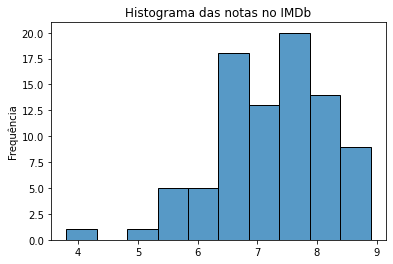

In [29]:
fig, ax = plt.subplots()
sns.histplot(data = dados, x = "Nota")
ax.set(xlabel = None, ylabel = 'Frequência', title = 'Histograma das notas no IMDb')
ax.tick_params(axis = 'x', rotation = 0)

In [30]:
#fig, ax = plt.subplots()
#sns.boxplot(y=dados['Nota'], data=dados)
#ax.set(xlabel = None, ylabel = None, title = 'Boxplot das Notas')
#ax.tick_params(axis = 'x', rotation = 0)

In [31]:
#fig, ax = plt.subplots()
#sns.boxplot(x=dados['Ano'],y=dados['Nota'], data=dados)
#ax.set(xlabel = None, ylabel = None, title = 'Boxplot das notas no IMDb por ano de lançamento')
#ax.tick_params(axis = 'x', rotation = 0)

#fig, ax = plt.subplots()
#sns.boxplot(x='Ano', y='Nota', data=dados[dados['Ano']>2016])
#ax.set_title('Boxplot das notas no IMDb por ano de lançamento (após 2016)')
#ax.tick_params(axis = 'x', rotation = 0)

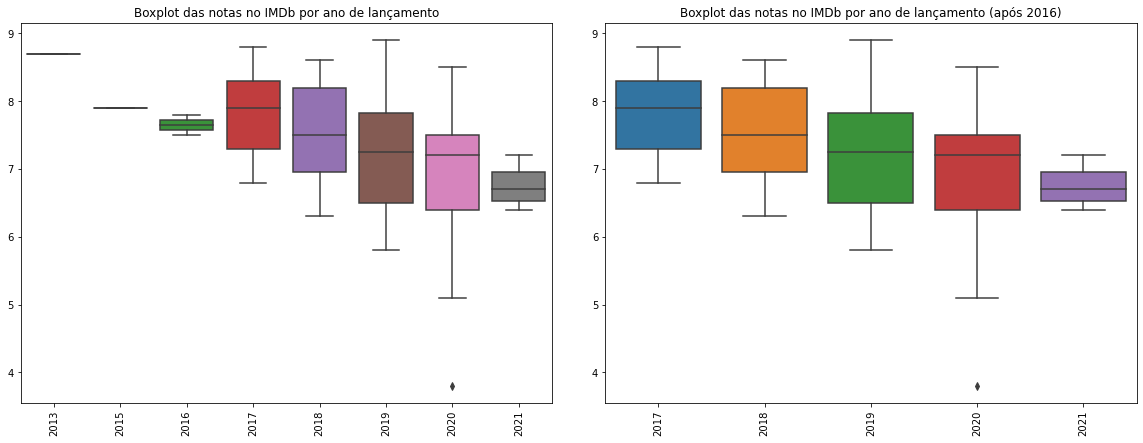

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.boxplot(ax=axes[0], x = dados['Ano'], y = dados['Nota'], data=dados)
axes[0].set(xlabel=None, ylabel=None, title = 'Boxplot das notas no IMDb por ano de lançamento')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.boxplot(ax=axes[1], x = 'Ano', y = 'Nota', data = dados[dados['Ano']>2016])
axes[1].set(xlabel=None, ylabel=None, title = 'Boxplot das notas no IMDb por ano de lançamento (após 2016)')
axes[1].tick_params(axis = 'x', rotation = 90)

In [33]:
df_aux = getCountParam(dados)

In [34]:
#fig, ax = plt.subplots()
#sns.boxplot(x = 'Gênero', y = 'Nota', data = df_aux)
#ax.set(xlabel = None, ylabel = None, title = 'Notas x Gênero')
#ax.tick_params(rotation = 90)

#fig, ax = plt.subplots()
#sns.countplot(x = 'Gênero', data = df_aux)
#ax.set(xlabel = None, ylabel = None)
#ax.tick_params(rotation = 90)

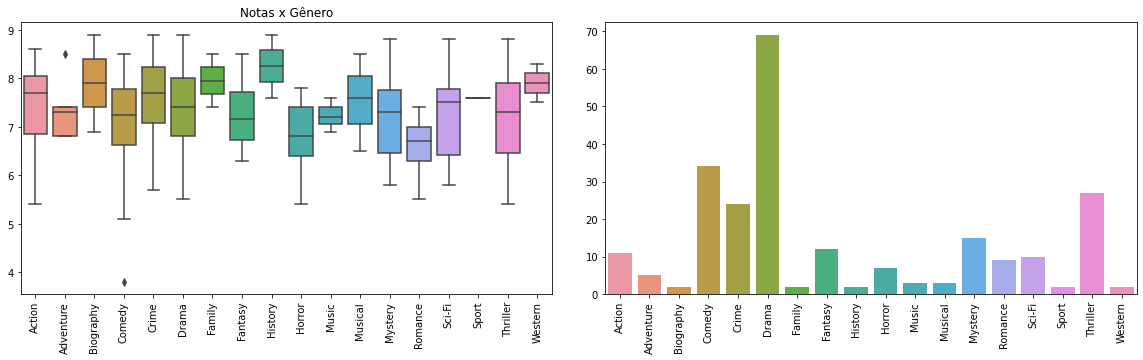

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

sns.boxplot(ax=axes[0], x = 'Gênero', y = 'Nota', data = df_aux)
axes[0].set(xlabel=None, ylabel=None, title = 'Notas x Gênero')
axes[0].tick_params(axis = 'x', rotation = 90)

sns.countplot(ax=axes[1],x = 'Gênero', data = df_aux)
axes[1].set(xlabel=None, ylabel=None)
axes[1].tick_params(axis = 'x', rotation = 90)

In [36]:
#dados.iloc[:, 24:].sum()
#dados.iloc[:, 24:].sum()*100/86

### Nota do IMDB e número de votos por engajamento

to DO: agrupar 4x4 nota por engajamento (scatter)

todos os count

<AxesSubplot:xlabel='Nota', ylabel='CountTotal'>

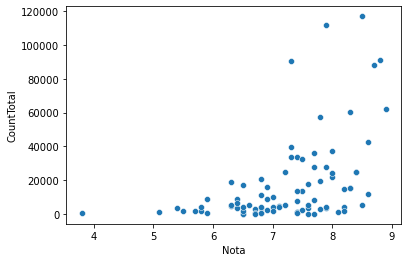

In [37]:
#dados['Nota'] CountPre CountDurante CountPos CountTotal

sns.scatterplot(data=dados, x="Nota", y="CountTotal")
#sns.regplot(data=dados[dados['Nota']>4], x="Nota", y="CountTotal")

#nota1.set_title('Histograma das notas no IMDb')
#nota1.set_ylabel('Frequência')

**VER QUAL O ERRO QUE TA DANDO AQUI**

In [38]:
#sns.boxplot(data=dados, x="Nota", y="País")#, hue=dados['País'])

In [39]:
#maiorespaises = dados[ (dados['País']=="United States") | (dados['País']=="Brazil") | (dados['País']=="South Korea") | (dados['País']=="United Kingdom") | (dados['País']=="Germany") | (dados['País']=="India")]
#sns.boxplot(data=maiorespaises, x="Nota", y="País")#, hue=dados['País'])


**DESCOMENTAR ACIMA**

Usar o codigo de genero para pais (fazer one hot encoding antes)

Não quer só a nota, quer outros atributos

In [40]:
#y = []
#coluna = []
#for i in range (24,dados.columns.size,1):
#    coluna.append(str(dados.columns[i]))
#    
#    aux = []
#    for j in range (0, len(dados[dados[coluna[-1]] == 1]['Nota']),1):
#        aux.append(dados[dados[coluna[-1]] == 1]['Nota'].values[j])
#        
#    y.append(aux)

#colunas = {'Nota':[], 'Gênero':[]}
#df_aux = pd.DataFrame(colunas)

#for i in range(len(y)):
#    for val in y[i]:
#        linha = {'Nota':val, 'Gênero':coluna[i]}
#        df_aux = df_aux.append(linha, ignore_index=True)

**TA DANDO ERRO AQUI, DESCOMENTAR ABAIXO**

In [41]:
#sns.boxplot(data=dados[dados['País'].str.contains(",")==False], x="Nota", y="País")#, hue=dados['País'])

<AxesSubplot:xlabel='Episodios', ylabel='count'>

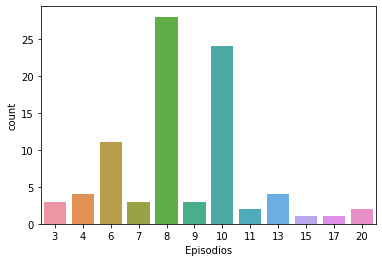

In [42]:
sns.countplot(data=dados, x="Episodios")

<AxesSubplot:xlabel='Episodios', ylabel='Nota'>

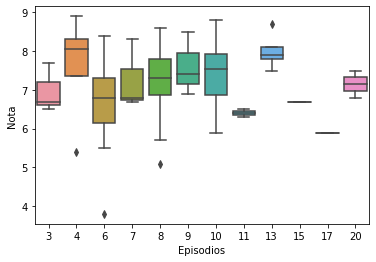

In [43]:
sns.boxplot(data=dados, x="Episodios", y="Nota")

Text(0.5, 0, 'Tipo de série')

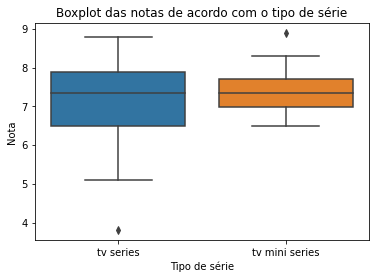

In [44]:
tipo1 = sns.boxplot(data=dados, x="Check", y="Nota")
tipo1.set_title('Boxplot das notas de acordo com o tipo de série')
tipo1.set_xlabel('Tipo de série')

In [45]:
#sns.scatterplot(data=dados, x="Nota", y="CountPre")

In [46]:
#sns.scatterplot(data=dados, x="Nota", y="CountDurante")

In [47]:
#sns.scatterplot(data=dados, x="Nota", y="CountPos")

In [48]:
#dados.corr(method='pearson')
#dados.corr(method='spearman')

In [49]:
#dados.corr(method='spearman')

In [50]:
#sns.scatterplot(data=dados, x="Ano", y="CountTotal") #countplot seria melhor?

In [51]:
#sns.scatterplot(data=dados, x="Ano", y="Votos")#ja fizemos o boxplot em baixo

In [52]:
#sns.scatterplot(data=dados, x="Votos", y="CountTotal")

In [53]:
#sns.scatterplot(data=dados, x="Nota", y="Votos")

## Votos

Text(0, 0.5, 'Frequência')

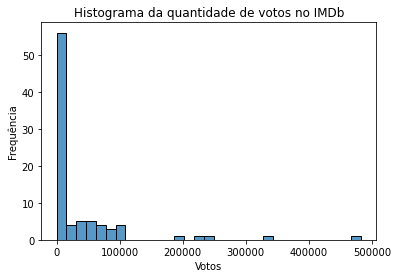

In [54]:
# 120000 - 20000 - 2500
votos1 = sns.histplot(data=dados, x="Votos")#, log_scale=True)

votos1.set_title('Histograma da quantidade de votos no IMDb')
votos1.set_ylabel('Frequência')

Text(0, 0.5, 'Frequência')

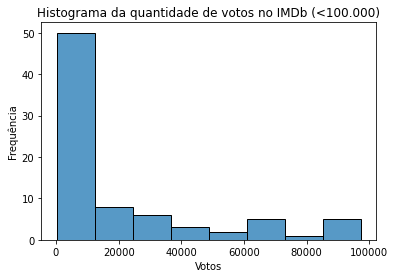

In [55]:
votos2 = sns.histplot(data=dados[dados['Votos']<100000], x="Votos")#, log_scale=True)

votos2.set_title('Histograma da quantidade de votos no IMDb (<100.000)')
votos2.set_ylabel('Frequência')

Text(0.5, 1.0, 'Diagrama de dispersão da nota e quantidade de votos no IMDb')

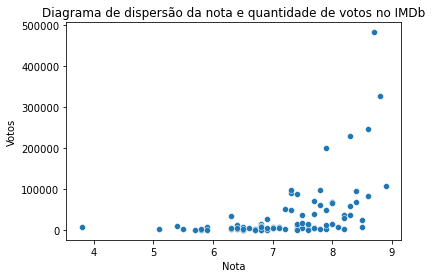

In [56]:
votos3 = sns.scatterplot(data=dados, x="Nota", y="Votos")
#sns.regplot(data=dados[dados['Nota']>4], x="Nota", y="Votos")

votos3.set_title('Diagrama de dispersão da nota e quantidade de votos no IMDb')


Text(0.5, 1.0, 'Boxplot da quantidade de votos no IMDb por ano de lançamento')

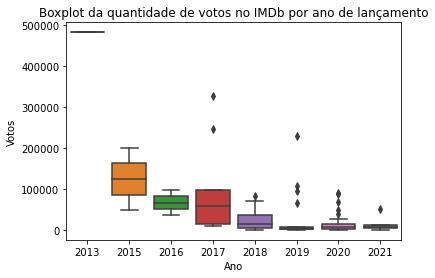

In [57]:
votos4 = sns.boxplot(data=dados, x="Ano", y="Votos")
votos4.set_title('Boxplot da quantidade de votos no IMDb por ano de lançamento')

**descomentar aqui embaixo**

In [58]:
#votos5 = sns.boxplot(data=dados, x="Votos", y="País")
#votos5.set_title('Boxplot da quantidade de votos por país de origem')

In [59]:
#maiorespaises = dados[ (dados['País']=="United States") | (dados['País']=="Brazil") | (dados['País']=="South Korea") | (dados['País']=="United Kingdom") | (dados['País']=="Germany") | (dados['País']=="India")]
#votos5 = sns.boxplot(data=maiorespaises, x="Votos", y="País")
#votos5.set_title('Boxplot da quantidade de votos por país de origem (mais populares)')

In [60]:
#votos5b = sns.boxplot(data=dados[dados['País'].str.contains(",")==False], x="Votos", y="País")
#votos5b.set_title('Boxplot da quantidade de votos por país de origem (mais populares)')


Text(0.5, 1.0, 'Boxplot da quantidade de votos por número de episódios')

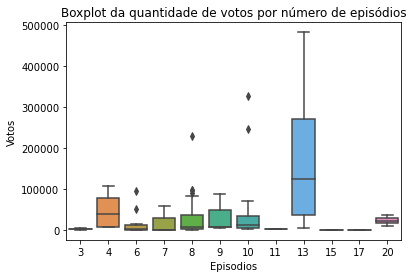

In [61]:
votos6 = sns.boxplot(data=dados, x="Episodios", y="Votos")
votos6.set_title('Boxplot da quantidade de votos por número de episódios')

Text(0.5, 0, 'Reviews dos usuários do IMDb')

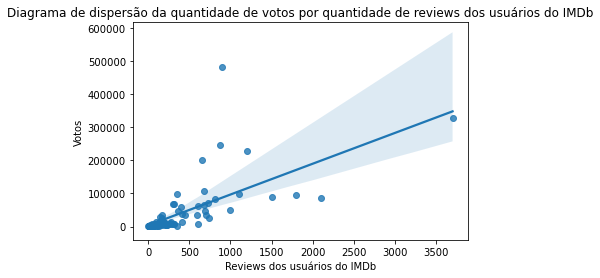

In [62]:
#sns.scatterplot(data=dados, x="user_reviews", y="Votos")
votos7 = sns.regplot(data=dados, x="user_reviews", y="Votos")
votos7.set_title('Diagrama de dispersão da quantidade de votos por quantidade de reviews dos usuários do IMDb')
votos7.set_xlabel('Reviews dos usuários do IMDb')

Text(0.5, 0, 'Reviews dos críticos do IMDb')

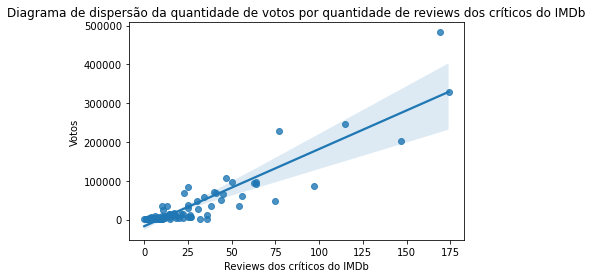

In [63]:
#sns.scatterplot(data=dados, x="critic_reviews", y="Votos")
votos8 = sns.regplot(data=dados, x="critic_reviews", y="Votos")
votos8.set_title('Diagrama de dispersão da quantidade de votos por quantidade de reviews dos críticos do IMDb')
votos8.set_xlabel('Reviews dos críticos do IMDb')

## Duração

Text(0, 0.5, 'Frequência')

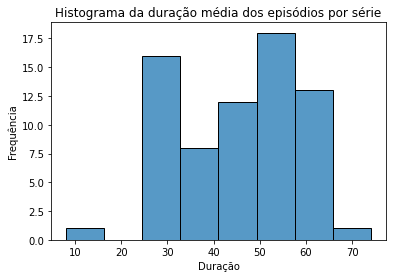

In [64]:
dura1 = sns.histplot(data=dados, x="Duração")
dura1.set_title('Histograma da duração média dos episódios por série')
dura1.set_ylabel('Frequência')

In [65]:
#dura2=sns.boxplot(data=dados, x="Duração")
#dura2.set_title('Boxplot da duração média dos episódios por série')

<AxesSubplot:xlabel='Duração', ylabel='Votos'>

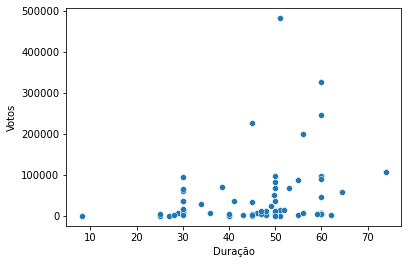

In [66]:
sns.scatterplot(data=dados, x="Duração", y="Votos")

Text(0.5, 1.0, 'Boxplot da duração média de episódios por ano de lançamento da série')

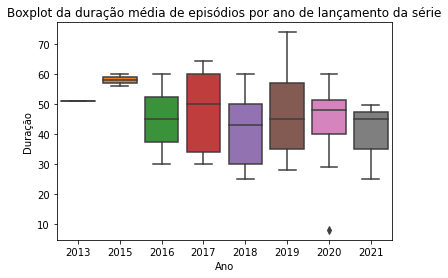

In [67]:
dura3=sns.boxplot(data=dados, x="Ano", y="Duração")
dura3.set_title('Boxplot da duração média de episódios por ano de lançamento da série')

Text(0.5, 0, 'Tipo de série')

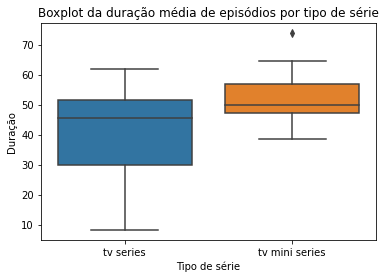

In [68]:
dura4=sns.boxplot(data=dados, x="Check", y="Duração")
dura4.set_title('Boxplot da duração média de episódios por tipo de série')
dura4.set_xlabel('Tipo de série')

## Ano

Text(0, 0.5, 'Frequência')

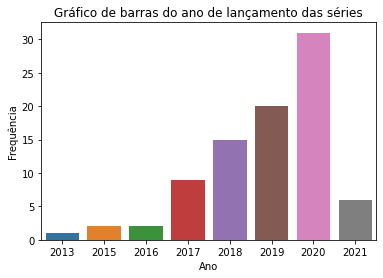

In [69]:
ano1 = sns.countplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)
ano1.set_title('Gráfico de barras do ano de lançamento das séries')
ano1.set_ylabel('Frequência')

In [70]:
#sns.boxplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)

## Data de estréia

Text(0, 0.5, 'Frequência')

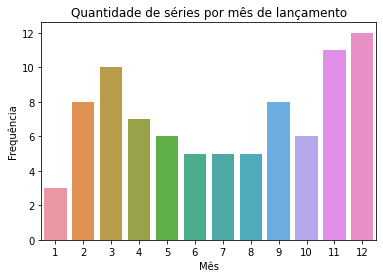

In [71]:
mes1 = sns.countplot(data=dados, x="mes")
mes1.set_title('Quantidade de séries por mês de lançamento')
mes1.set_xlabel('Mês')
mes1.set_ylabel('Frequência')

## País

In [72]:
dados['País'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[United States]                                     34
[Brazil]                                             5
[South Korea]                                        5
[United Kingdom]                                     5
[Germany]                                            5
[India]                                              4
[Mexico, United States]                              2
[Spain]                                              2
[Colombia]                                           2
[Mexico]                                             2
[France]                                             2
[Japan]                                              2
[Taiwan]                                             2
[Turkey]                                             2
[Italy]                                              1
[Germany, United States]                             1
[Lebanon]                                            1
[Sweden]                                             1
[Australia

**descomentar abaixo**

In [73]:
#fig, ax = plt.subplots()
#sns.countplot(data=dados[dados['País'].str.contains(",")==False], x="País")
#ax.tick_params(rotation=90)


## Idiomas

In [74]:
dados['Idiomas'].value_counts()

English                                              42
Spanish                                               7
Portuguese                                            5
German                                                4
Korean                                                4
Hindi                                                 3
French                                                2
Mandarin, English                                     1
Tamil                                                 1
Mandarin, Min Nan                                     1
Italian                                               1
Turkish                                               1
Turkish, Arabic, Kurdish                              1
Japanese                                              1
English, Japanese                                     1
German, English                                       1
Arabic                                                1
French, English                                 

<AxesSubplot:xlabel='Idiomas', ylabel='count'>

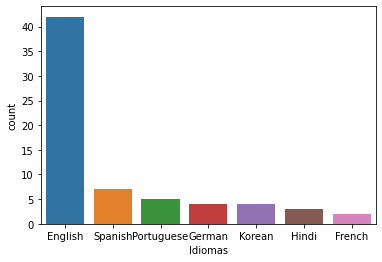

In [75]:
sns.countplot(data=dados, x="Idiomas", order=dados.Idiomas.value_counts().iloc[:7].index)

#visCausaMorte = sns.countplot(x="CAUSABAS", order=dados.CAUSABAS.value_counts().iloc[:10].index, data=dados, palette="Set1")

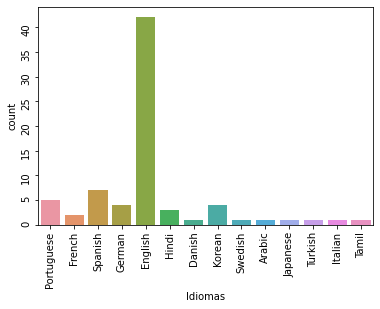

In [76]:
fig, ax = plt.subplots()
sns.countplot(data=dados[dados['Idiomas'].str.contains(",")==False], x="Idiomas")
ax.tick_params(rotation=90)

## Episódios

Text(0, 0.5, 'Frequência')

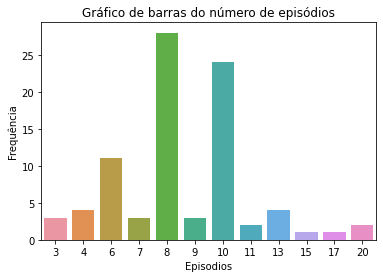

In [77]:
epis1 = sns.countplot(data=dados, x="Episodios")
epis1.set_title('Gráfico de barras do número de episódios')
epis1.set_ylabel('Frequência')

Text(0, 0.5, 'Frequência')

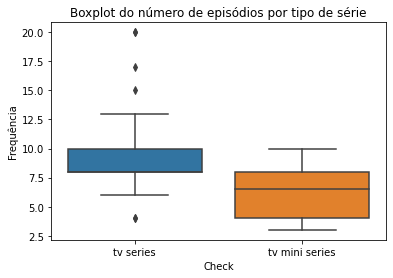

In [78]:
epis2 = sns.boxplot(data=dados, x="Check", y="Episodios")
epis2.set_title('Boxplot do número de episódios por tipo de série')
epis2.set_ylabel('Frequência')

## Reviews de usuários

Text(0.5, 0, 'Reviews dos usuários no IMDb')

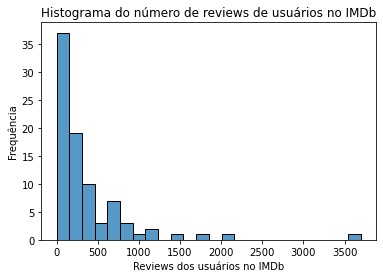

In [79]:
rev1 = sns.histplot(data=dados, x="user_reviews")
rev1.set_title('Histograma do número de reviews de usuários no IMDb')
rev1.set_ylabel('Frequência')
rev1.set_xlabel('Reviews dos usuários no IMDb')

Text(0, 0.5, 'Reviews dos usuários no IMDb')

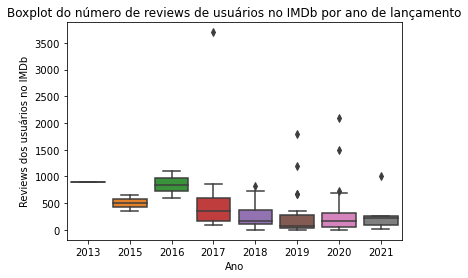

In [80]:
rev2 = sns.boxplot(data=dados, x = "Ano",y="user_reviews")
rev2.set_title('Boxplot do número de reviews de usuários no IMDb por ano de lançamento')
rev2.set_ylabel('Reviews dos usuários no IMDb')

## Reviews de críticos

Text(0, 0.5, 'Frequência')

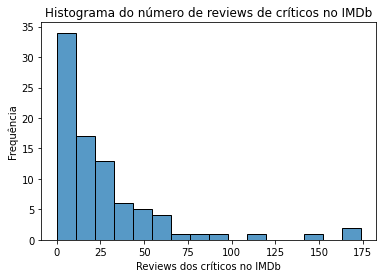

In [81]:
rev3 = sns.histplot(data=dados, x="critic_reviews")

rev3.set_title('Histograma do número de reviews de críticos no IMDb')
rev3.set_xlabel('Reviews dos críticos no IMDb')
rev3.set_ylabel('Frequência')

Text(0, 0.5, 'Reviews dos críticos no IMDb')

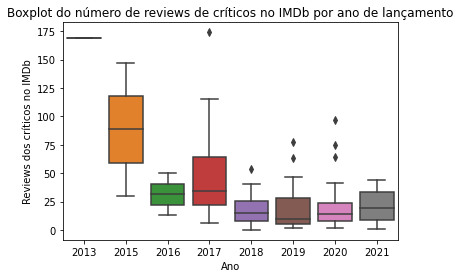

In [82]:
rev4 = sns.boxplot(data=dados, x = "Ano",y="critic_reviews")

rev4.set_title('Boxplot do número de reviews de críticos no IMDb por ano de lançamento')
rev4.set_ylabel('Reviews dos críticos no IMDb')

# Engajamento (counts)

## Histogramas do números de tweets em difentes fases (Total, Pré, Durante, Pós)

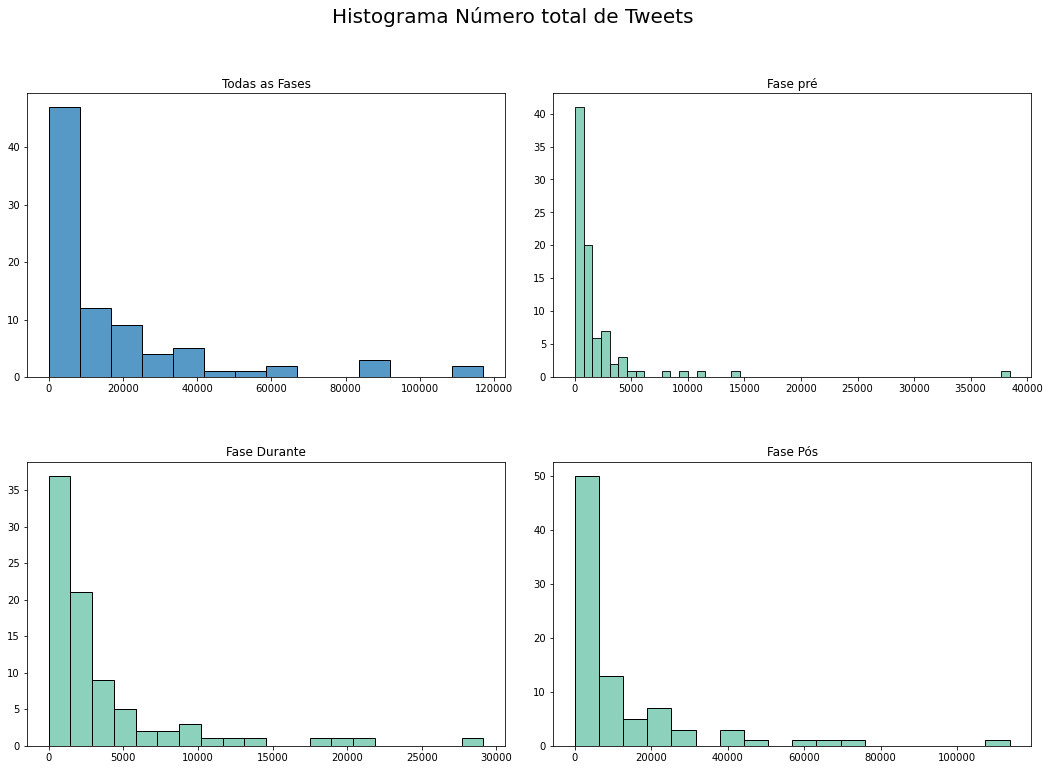

In [83]:
tit = "Histograma Número total de Tweets"
x1 = "CountTotal"
x2 = "CountPre"
x3 = "CountDurante"
x4 = "CountPos"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, x2 = x2, x3 = x3, x4 = x4, tipo = 'hist')

## Total de Tweets x Ano

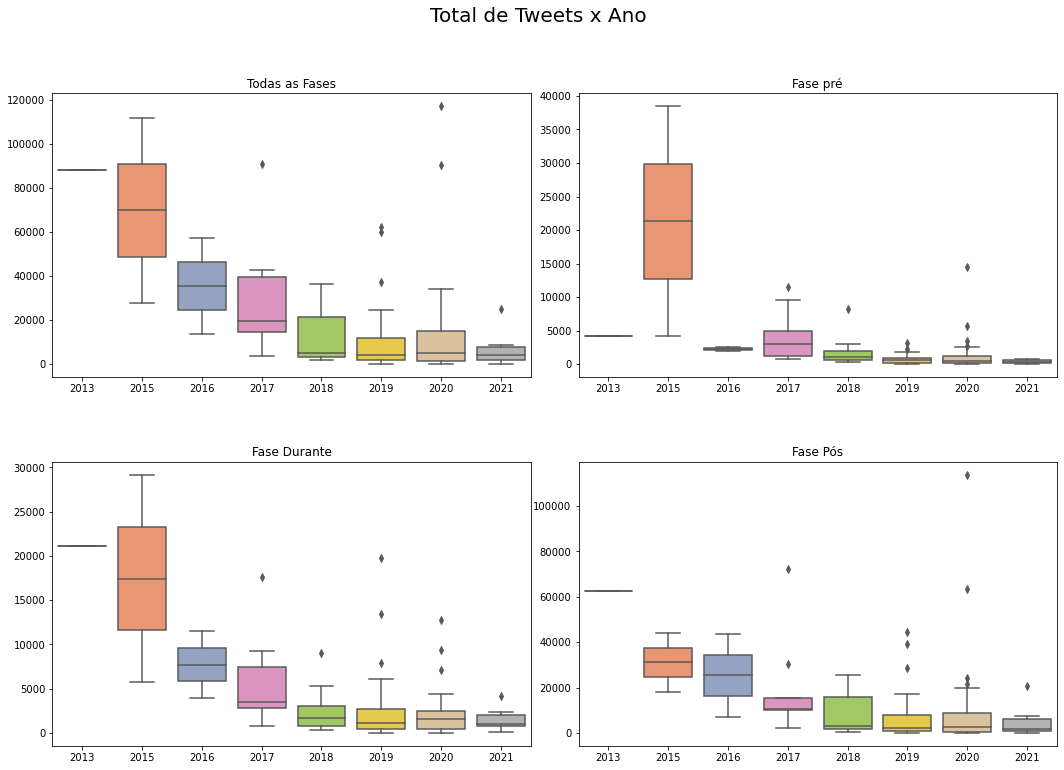

In [84]:
tit = "Total de Tweets x Ano"
x1 = "Ano"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x Gênero

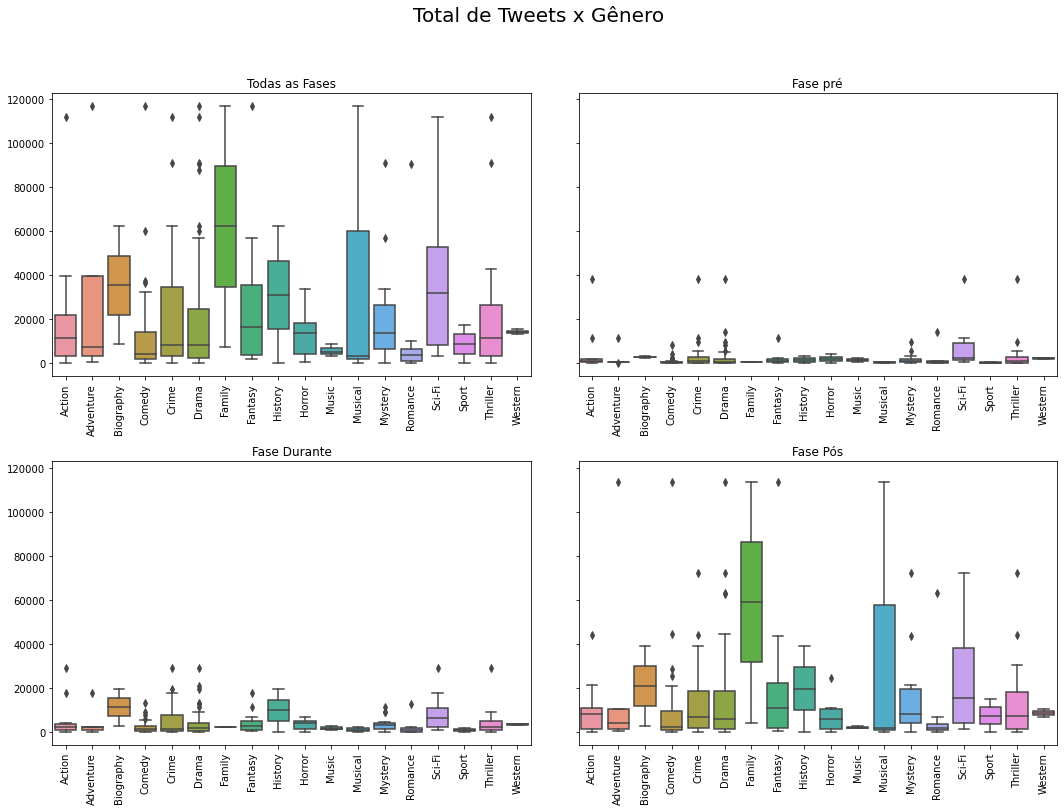

In [85]:
tit = 'Total de Tweets x Gênero'
x1 = 'Gênero'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "CountTotal", nome_col1 = 'Count')     #dfTotal = getCount("CountTotal")
dfPre = getCountParam(dados, tipocount = "CountPre", nome_col1 = 'Count')         #dfPre = getCount("CountPre")
dfDurante = getCountParam(dados, tipocount = "CountDurante", nome_col1 = 'Count') #dfDurante = getCount("CountDurante")
dfPos = getCountParam(dados, tipocount = "CountPos", nome_col1 = 'Count')         #dfPos = getCount("CountPos")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = True)

## Total de Tweets x Mês de Estréia

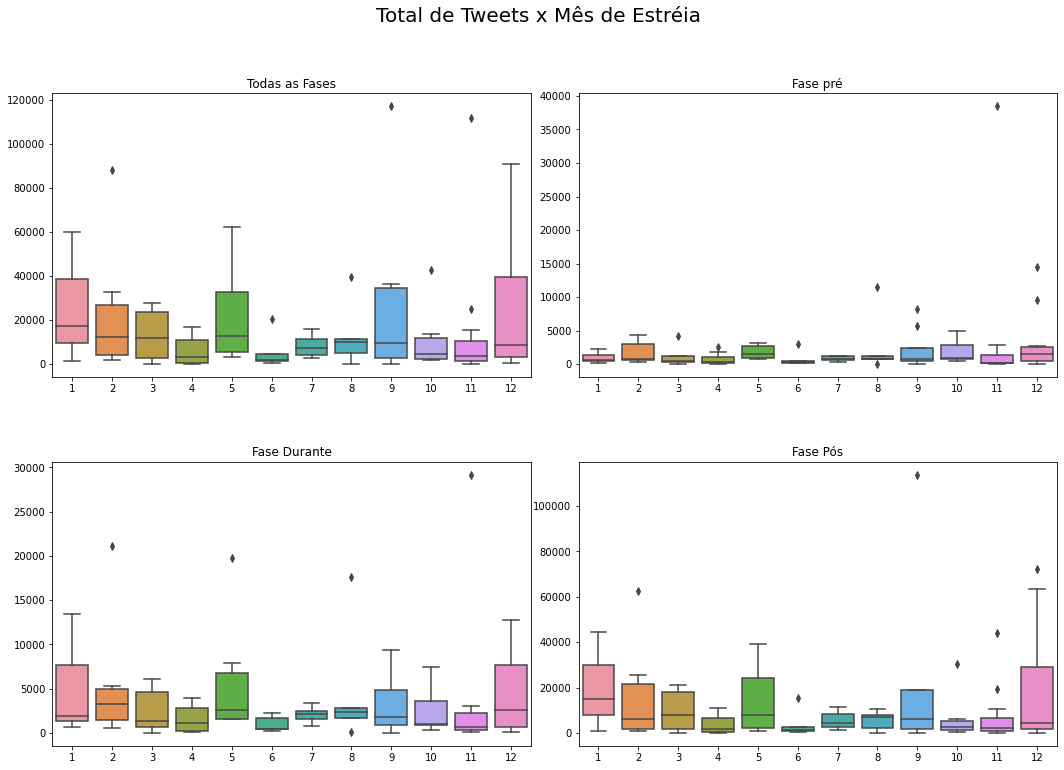

In [86]:
tit = 'Total de Tweets x Mês de Estréia'
x1 = "mes"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x Tipo da Série

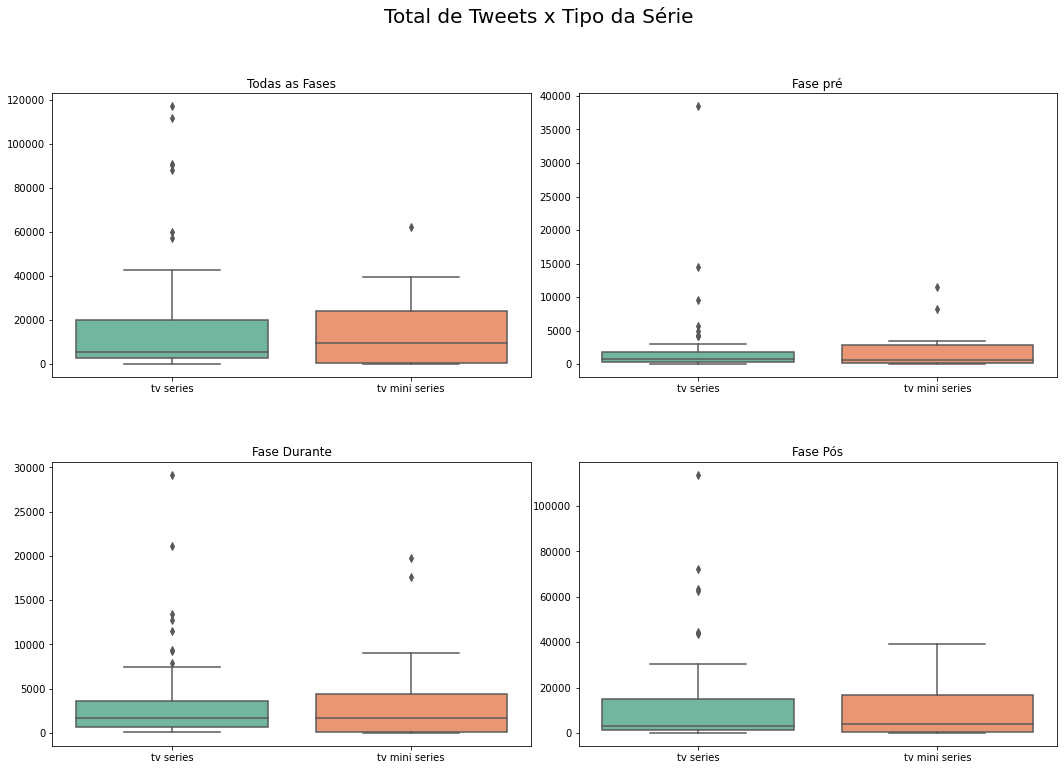

In [87]:
tit = 'Total de Tweets x Tipo da Série'
x1 = "Check"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x Episódios

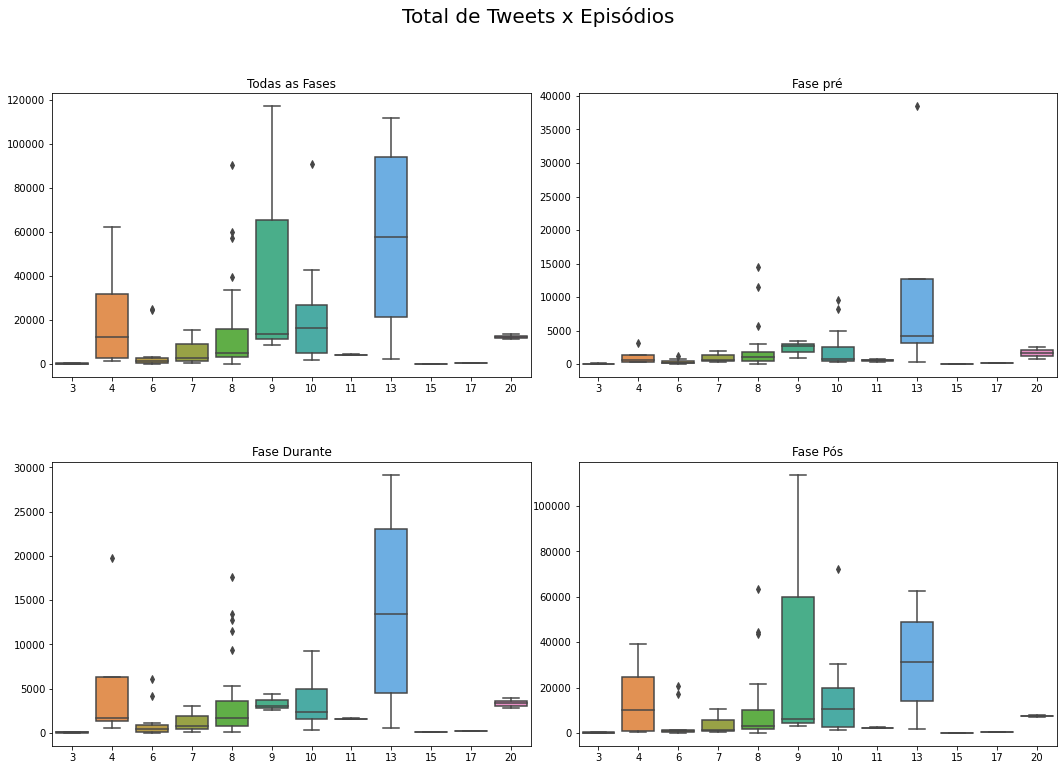

In [88]:
tit = 'Total de Tweets x Episódios'
x1 = "Episodios"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1)

## Total de Tweets x País

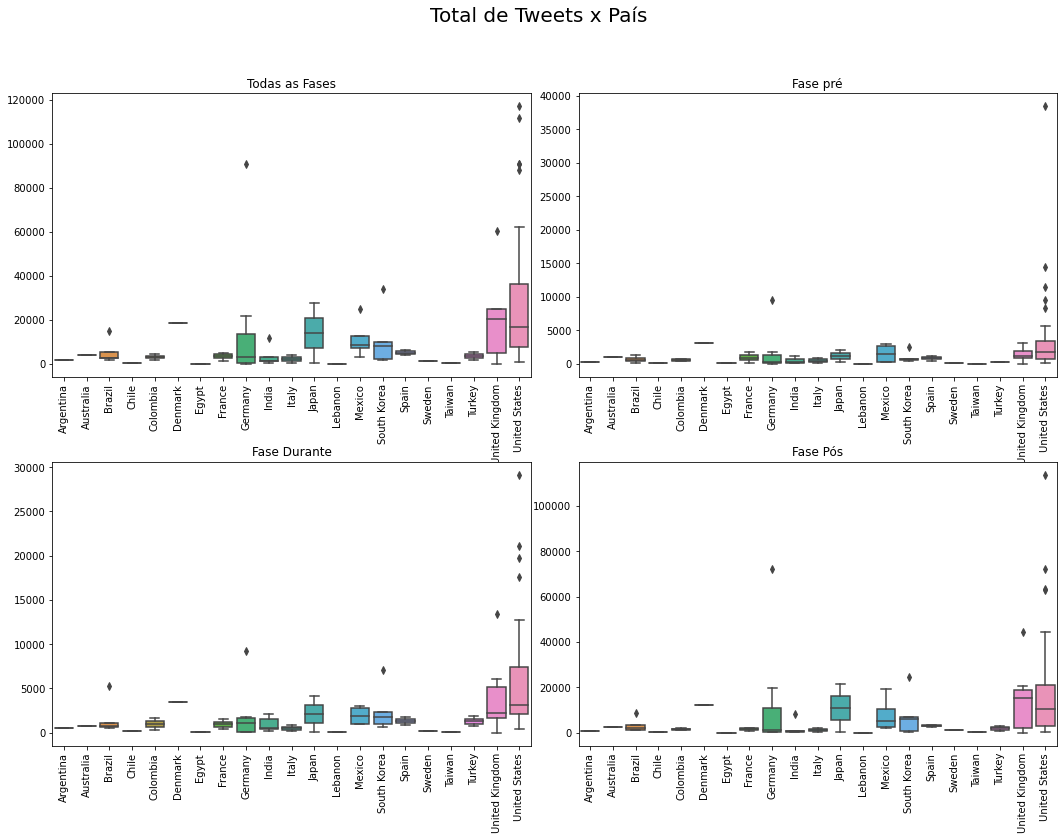

In [89]:
tit = 'Total de Tweets x País'
x1 = 'País'
y1 = 'Count'
dfTotal = getCountParam(dados, tipocount = "CountTotal", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPre = getCountParam(dados, tipocount = "CountPre", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfDurante = getCountParam(dados, tipocount = "CountDurante", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")
dfPos = getCountParam(dados, tipocount = "CountPos", nome_col1 = 'Count', nome_col2 = 'País', inicio = "Argentina", fim = "United States")

plot_2x2(tit, dfTotal, dfPre, dfDurante, dfPos, x1, y1, y2 = y1, y3 = y1, y4 = y1, rx = 90, share = False)

In [90]:
#Os países não estão separados
#tit = 'Total de Tweets x País'
#x1 = "País"
#dado1 = dado2 = dado3 = dado4 = dados

#plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 90)

## [!] Total de Tweets x Idiomas

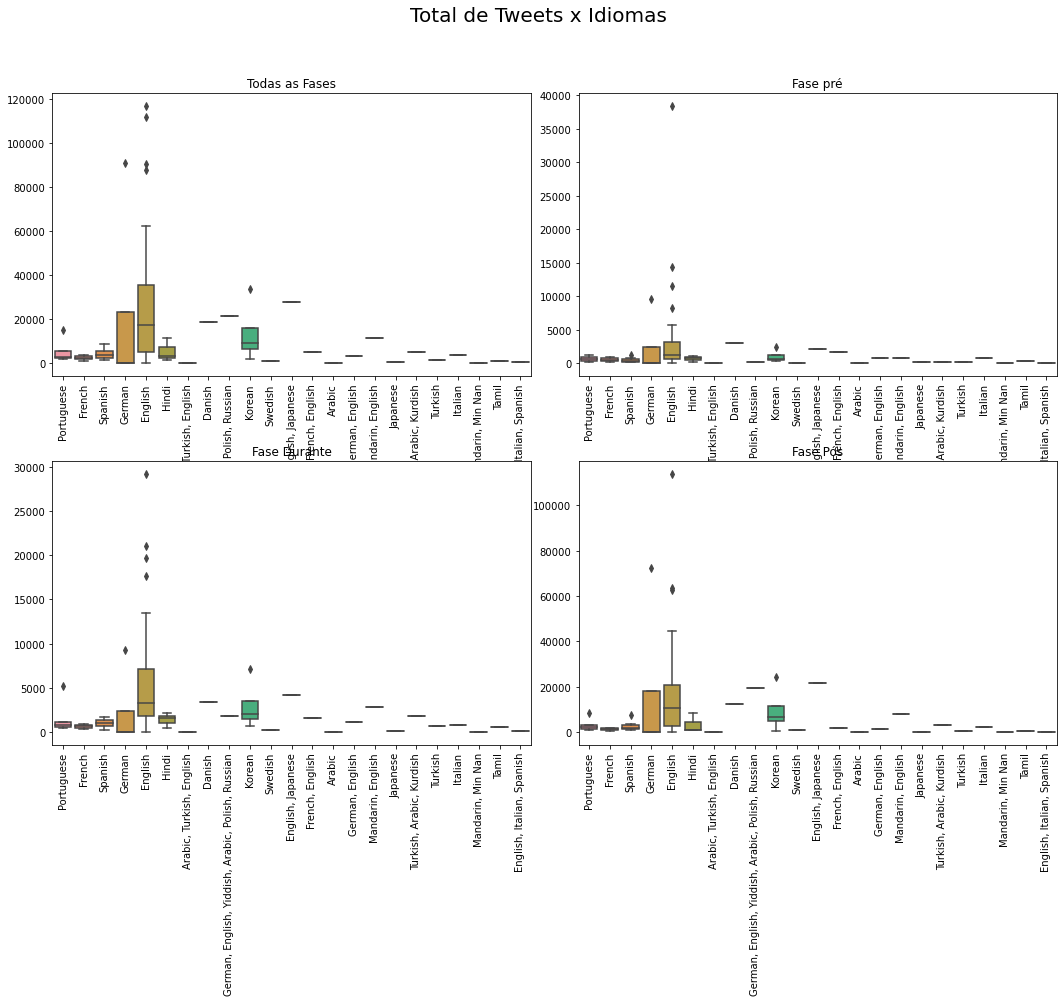

In [91]:
tit = 'Total de Tweets x Idiomas'
x1 = "Idiomas"
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 90)

# Série Temporal do engajamento

### Número e duração de episódios por engajamento

<AxesSubplot:xlabel='Episodios', ylabel='CountTotal'>

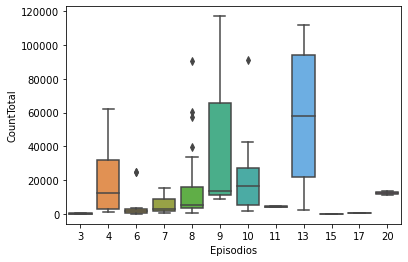

In [92]:
sns.boxplot(data=dados, x="Episodios", y="CountTotal")

<AxesSubplot:xlabel='Duração', ylabel='CountTotal'>

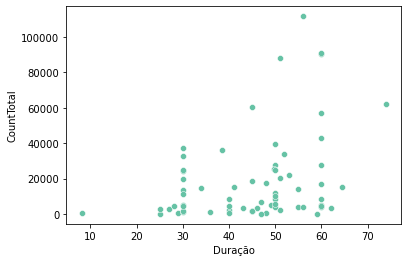

In [93]:
sns.scatterplot(data=dados, x="Duração", y="CountTotal")

In [94]:
dados[dados['Duração']>100] #corrigir, pegar a media por episodio (duracao/episodios)

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Japan,Lebanon,Mexico,South Korea,Spain,Sweden,Taiwan,Turkey,United Kingdom,United States


## Atores e engajamento

## Influência de engajamento anterior no posterior

<AxesSubplot:xlabel='CountPre', ylabel='CountDurante'>

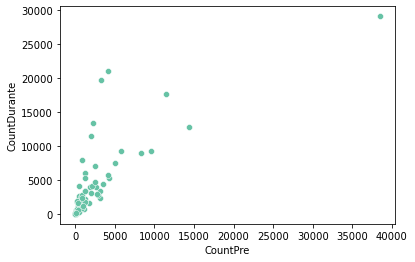

In [95]:
sns.scatterplot(data=dados, x="CountPre", y="CountDurante")

<AxesSubplot:xlabel='CountDurante', ylabel='CountPos'>

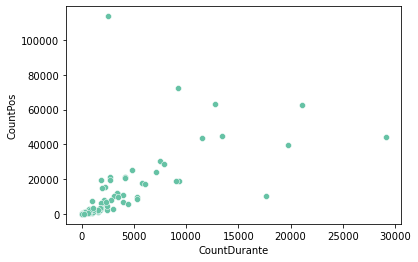

In [96]:
sns.scatterplot(data=dados, x="CountDurante", y="CountPos")

## Engajamento e genêro

In [97]:
# dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
# dados['Gênero']

In [98]:
# pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# # Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

## Censura e engajamento

## Reviews e engajamento

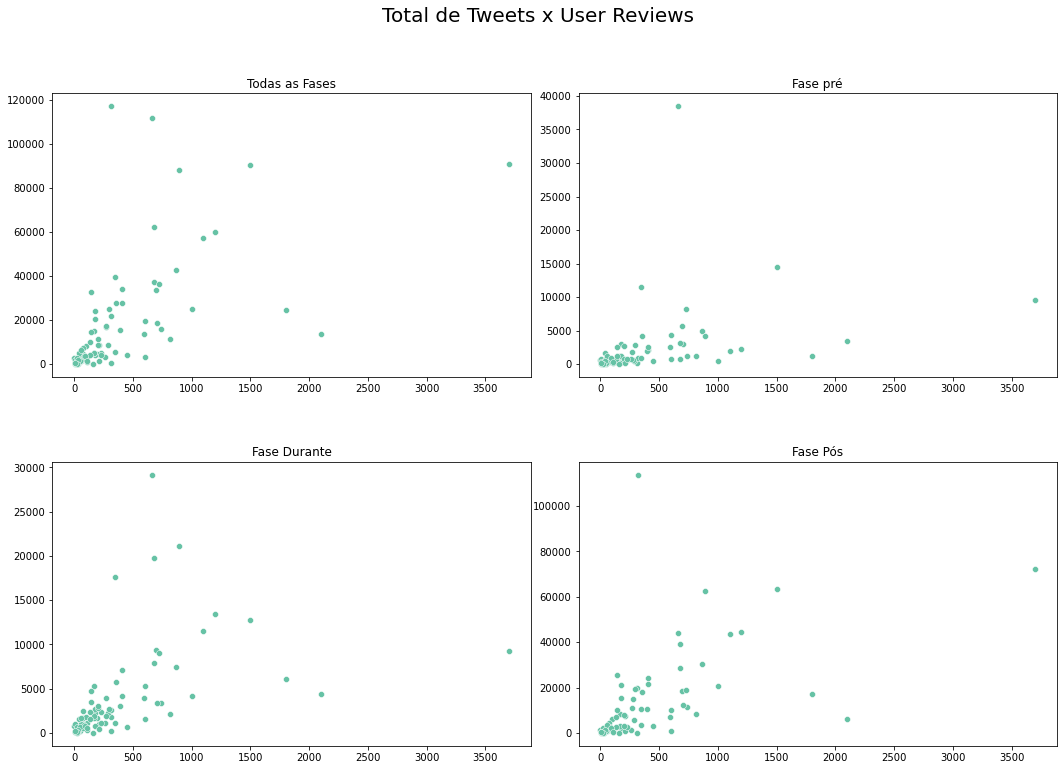

In [99]:
tit = "Total de Tweets x User Reviews"
x1 = "user_reviews"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

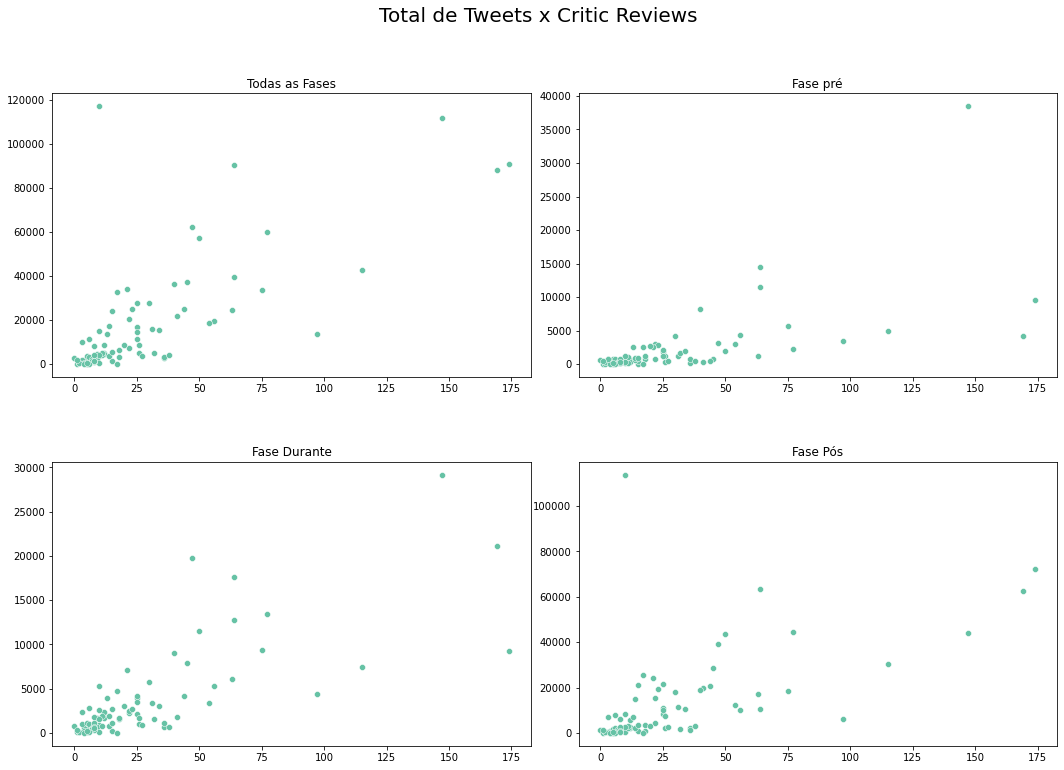

In [100]:
tit = "Total de Tweets x Critic Reviews"
x1 = "critic_reviews"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

### Nota

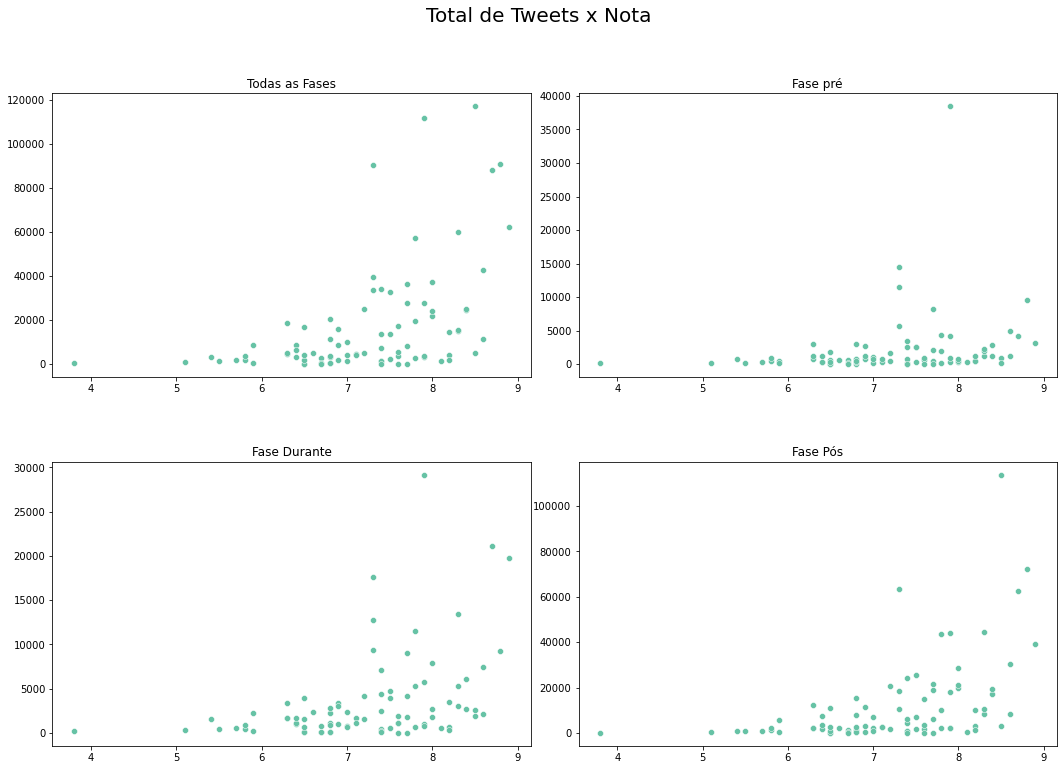

In [101]:
tit = "Total de Tweets x Nota"
x1 = "Nota"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)

### Votos

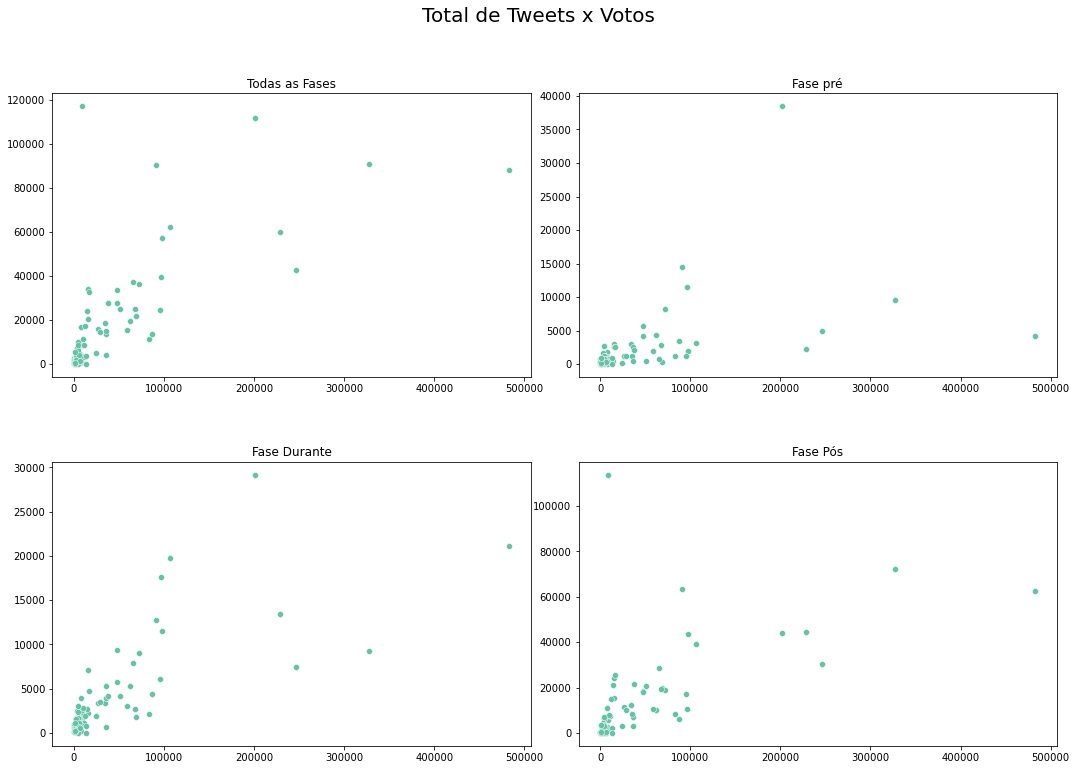

In [102]:
tit = "Total de Tweets x Votos"
x1 = "Votos"
tipo_plot = 'scatter'
dado1 = dado2 = dado3 = dado4 = dados

plot_2x2(tit, dado1, dado2, dado3, dado4, x1, rx = 0, tipo = tipo_plot)